# Part II : Spectrum Analysis

In the second part of the astrophysics laboratory, you will compare the oscillation frequencies obtained in the first part with real data measured by the Global Oscillation Low Frequency experiment (GOLF) aboard the ESA-NASA’s Solar and Heliospheric Observatory (SoHO), which is orbiting the earth at a distance of 1.5 million kilometres (about four times the distance to the moon). The experiment records variations in the Sun’s luminosity, from which its surface velocity dispersion is deduced. Your task is to use the velocity dispersion time series to obtain the measured oscillation frequencies.

## Exercise 1
The time-series for this part of the project have been acquired by two different Photomultipliers (pm1 and pm2) of the experiment. The detectors have been further calibrated using two different methods (calib1 and calib2).

### 1 (a)
Plot the Velocity dispersions measured by the different satellite photo multipliers for each calibration method.
CAUTION: Be sure to read the file readme_data_golf.txt.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks


In [85]:
def read_data(file_path):
    data_list = []
    with open(file_path, 'r') as file:
        for line in file:
            #split the line into values (assuming space-separated values)
            values = line.split()
            data_list.extend([float(value) for value in values])

    data_array = np.array(data_list)
    
    return data_array

In [86]:
path_golf = "../DataSeries"
data = {}
data["calib1_pm1"] = read_data(f'{path_golf}/data2_calib1_pm1_960411_961010.dat')
data["calib1_pm2"] = read_data(f'{path_golf}/data2_calib1_pm2_960411_961010.dat')

data["calib2_pm1"] = read_data(f'{path_golf}/data2_calib2_pm1_960411_961010.dat')
data["calib2_pm2"] = read_data(f'{path_golf}/data2_calib2_pm2_960411_961010.dat')


In [87]:
time = np.arange(790560) # number of data points
time = [9.5 + 20 * t for t in time] # data centered at 00h00mn9.5sec UT
#freq= [1./t for t in time]


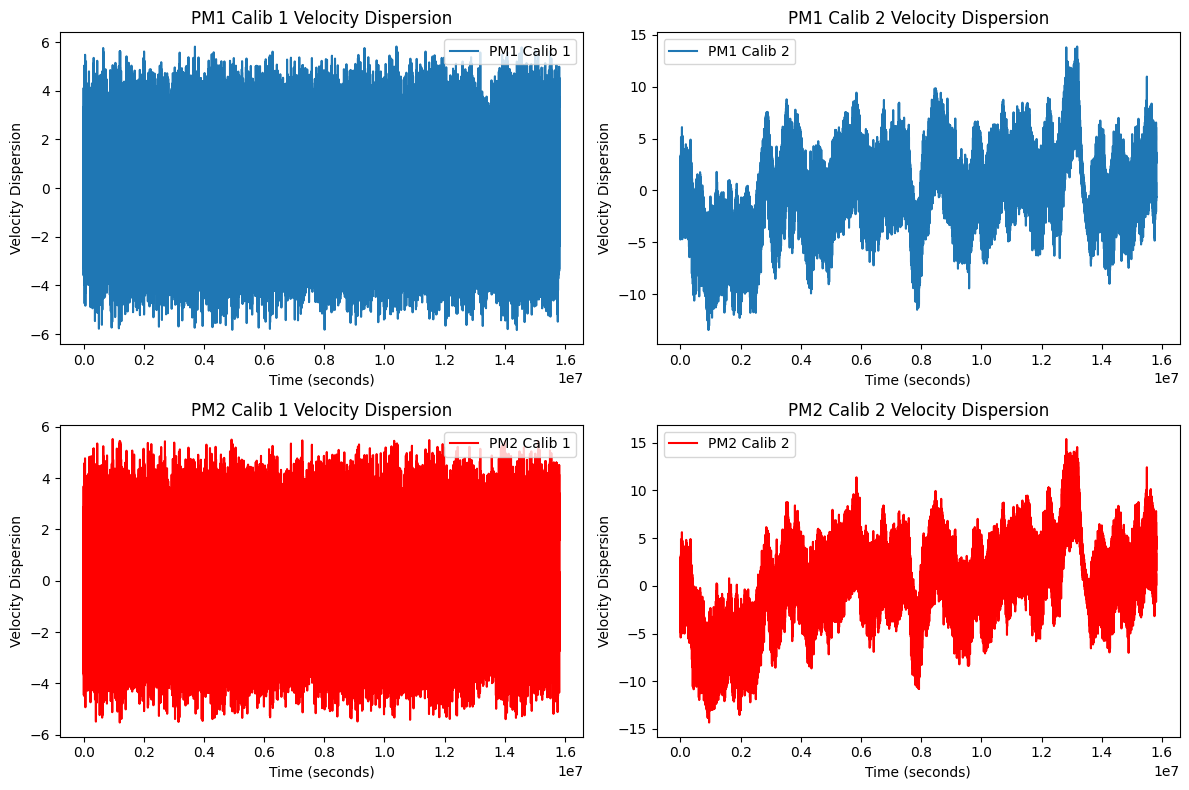

In [88]:

plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.plot(time, data["calib1_pm1"], label="PM1 Calib 1")
plt.title("PM1 Calib 1 Velocity Dispersion")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity Dispersion")
plt.legend()

plt.subplot(222)
plt.plot(time, data["calib2_pm1"], label="PM1 Calib 2")
plt.title("PM1 Calib 2 Velocity Dispersion")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity Dispersion")
plt.legend()

plt.subplot(223)
plt.plot(time, data["calib1_pm2"], label="PM2 Calib 1", color='red')
plt.title("PM2 Calib 1 Velocity Dispersion")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity Dispersion")
plt.legend()

plt.subplot(224)
plt.plot(time, data["calib2_pm2"], label="PM2 Calib 2", color='red')
plt.title("PM2 Calib 2 Velocity Dispersion")
plt.xlabel("Time (seconds)")
plt.ylabel("Velocity Dispersion")
plt.legend()

plt.tight_layout()
plt.show()

### 1 (b)

Choose one of the data-sets. Justify your choice.

Considering both calibration methods calib1 provides more accurate and precise results. Comparing the consistency of measurements obtained from Calib 1 and Calib 2 we can notice that calib1 has smaller variations of solar activity in the time series so as lower standard deviations, which indicates higher accuracy. 

## Exercise 2

To obtain the frequency oscillation modes, you will have to perform a Fourier transform to the velocity dispersion

### 2 (a)

Apply the Fourier transform to the chosen data-set, and plot the result.

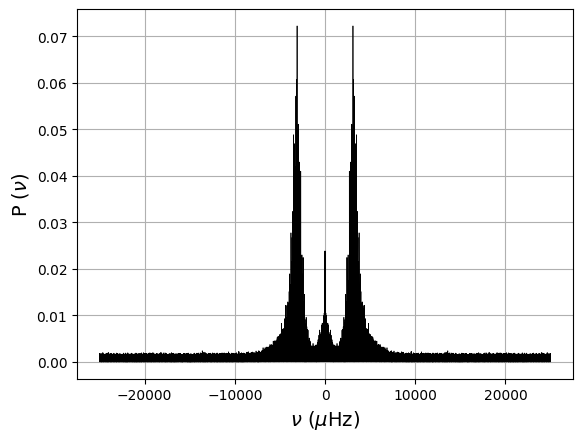

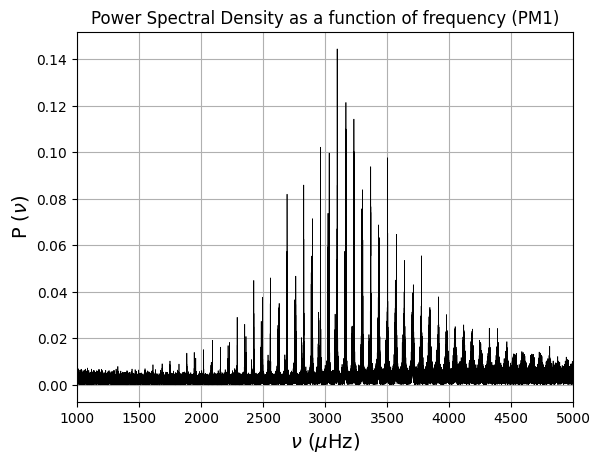

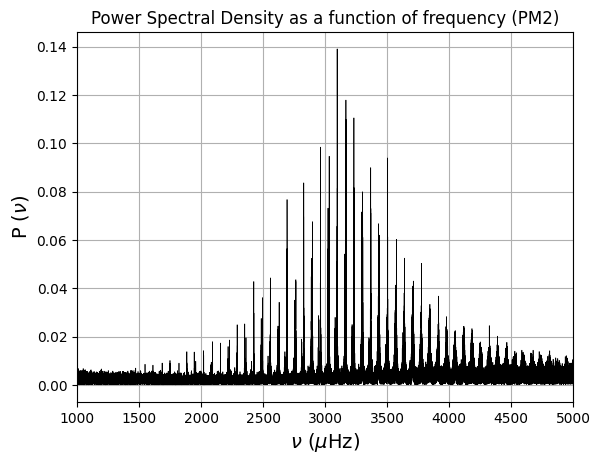

In [89]:
#'The total number of points is 790560, corresponding
#to a sampling time of 20s. The first point corresponds to an integration
#centered on 00h00mn9.5sec of UT time aboard SOHO.'

time = np.arange(790560) # number of data points
time = [9.5 + 20 * t for t in time]

freq = fftfreq(790560, 20)

fft_v_pm1_cali1 = fft(data["calib1_pm1"])
fft_v_pm1_cali2 = fft(data["calib2_pm1"])
fft_v_pm2_cali1 = fft(data["calib1_pm2"])
fft_v_pm2_cali2 = fft(data["calib2_pm2"])

plt.plot(freq*1e6, 1.0/790560 * np.abs(fft_v_pm1_cali1)[0:790560], color="black", linewidth=0.5)
plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
plt.ylabel (r'P ($\nu$)', size=14)
#plt.xlim(1000, 5000)
plt.grid()
plt.show()


#If you're taking the FFT of a real input signal, then the positive and negative frequency parts have equal power, 
# so you can just plot the positive frequency power spectrum and multiply by 2.
#[0:790560//2] selects the first half of the FFT results, corresponding to the positive frequencies.
 
freq = freq[:790560//2]

plt.plot(freq*1e6, 2.0/790560 * np.abs(fft_v_pm1_cali1)[0:790560//2], color="black", linewidth=0.5)
plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
plt.ylabel (r'P ($\nu$)', size=14)
plt.xlim(1000, 5000)
plt.title('Power Spectral Density as a function of frequency (PM1)')
plt.grid()
plt.show()

plt.plot(freq*1e6, 2.0/790560 * np.abs(fft_v_pm2_cali1)[0:790560//2], color="black", linewidth=0.5)
plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
plt.ylabel (r'P ($\nu$)', size=14)
plt.xlim(1000, 5000)
plt.title('Power Spectral Density as a function of frequency (PM2)')
plt.grid()
plt.show()

### 2 (b)

What is the order of magnitude of the observed frequencies/periods? Can you explain why there are high intensity peaks near f ≈0 Hz?


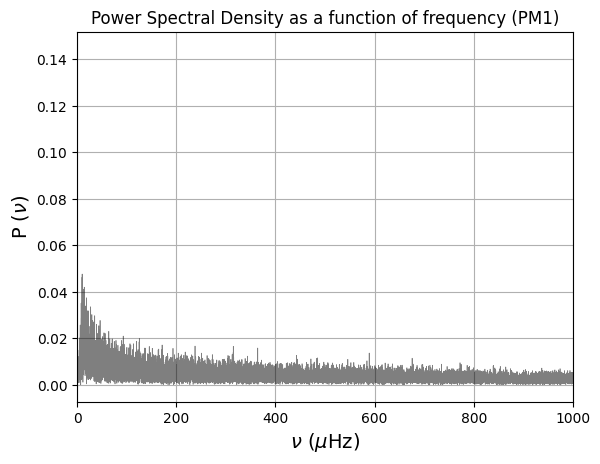

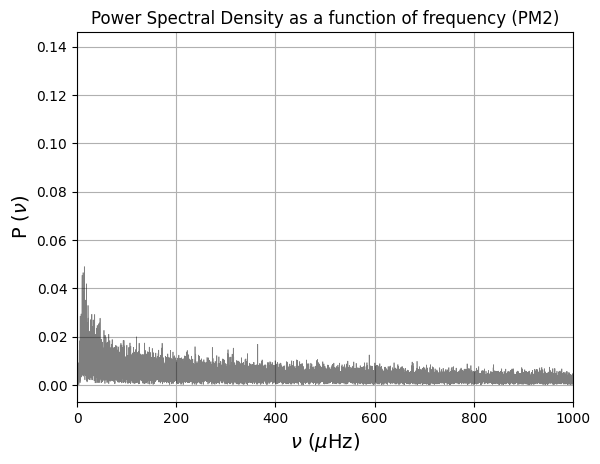

In [90]:
plt.plot(freq*1e6, 2.0/790560 * np.abs(fft_v_pm1_cali1)[0:790560//2], color="black", linewidth=0.5, alpha=0.5)
plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
plt.ylabel (r'P ($\nu$)', size=14)
plt.xlim(1000, 5000)
plt.title('Power Spectral Density as a function of frequency (PM1)')
plt.grid()
plt.xlim([0,1000])
plt.show()

plt.plot(freq*1e6, 2.0/790560 * np.abs(fft_v_pm2_cali1)[0:790560//2], color="black", linewidth=0.5,alpha=0.5)
plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
plt.ylabel (r'P ($\nu$)', size=14)
plt.xlim(1000, 5000)
plt.title('Power Spectral Density as a function of frequency (PM2)')
plt.grid()
plt.xlim([0,1000])
plt.show()

## Exercise 3

To identify each eigen-frequency, you will need to compare the observed frequencies
(obtained from Fourier analysis of the data-series) with the theoretical frequencies
obtained by modelling the Sun.

### 3(a)
Match the observed frequencies with the oscillation frequencies obtained in Part I by direct comparison between the acoustic modes.

In [91]:
freqs_path  = "../Models/Model2/freqs_summary.txt"
column_names = ["Re(freq)", "Im(freq)", "l", "n_g", "n_p", "n_pg"]
freqs= pd.read_csv(freqs_path, sep='\s+', header=None, names=column_names, skiprows=6)
print(freqs)

        Re(freq)  Im(freq)  l  n_g  n_p  n_pg
0     263.586812       0.0  0    0    1     1
1     405.484164       0.0  0    0    2     2
2     537.149241       0.0  0    0    3     3
3     680.907458       0.0  0    0    4     4
4     826.921436       0.0  0    0    5     5
..           ...       ... ..  ...  ...   ...
225  7434.959044       0.0  3    0   52    52
226  7573.442727       0.0  3    0   53    53
227  7711.759051       0.0  3    0   54    54
228  7849.785233       0.0  3    0   55    55
229  7987.519494       0.0  3    0   56    56

[230 rows x 6 columns]


In [92]:

model = {}
model["np"] = np.array(freqs.iloc[:,4].tolist())
model["l"] = np.array(freqs.iloc[:,2].tolist())
model["freq"] = np.array(freqs.iloc[:,0].tolist())



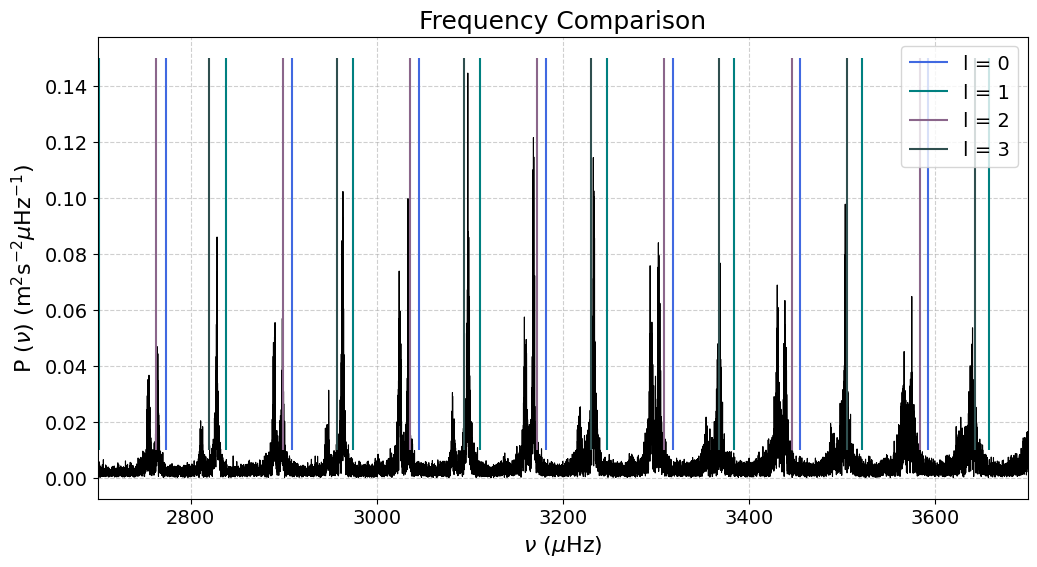

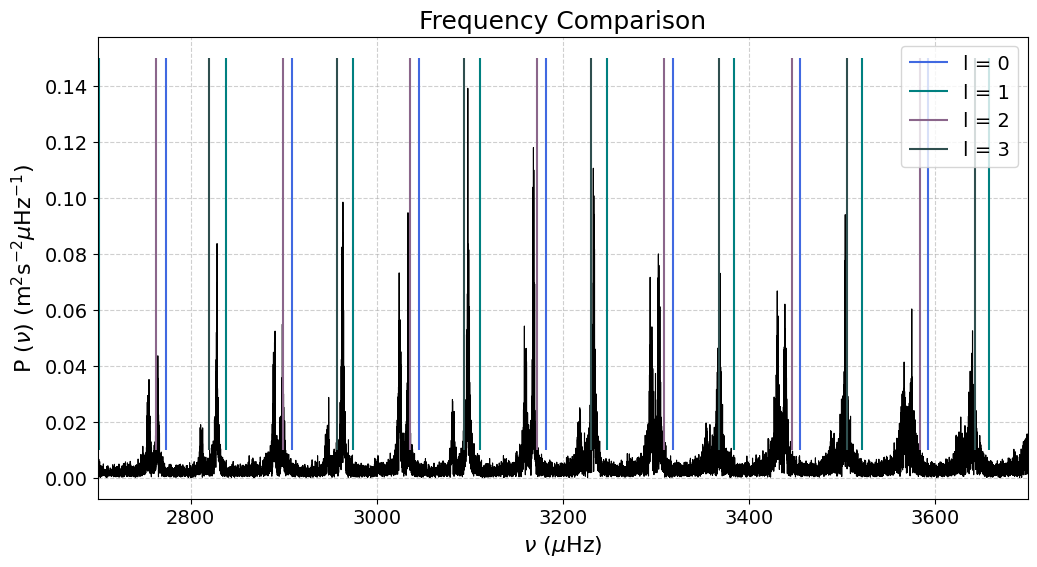

In [93]:
colors = ['#4169E1', '#008080', '#8B668B', '#2F4F4F']

def plot_frequency_comparison(freq, fft_data, model_freq, model_l, colors, xmin, xmax, figsize='large'):
    
    plt.figure(figsize=(12, 6))  

    # Plot the power spectral density
    plt.plot(freq * 1e6, 2.0 / len(fft_data) * np.abs(fft_data)[:len(fft_data) // 2], color="black", linewidth=0.8)  # Increase line width for clarity
    plt.xlabel(r'$\nu$ ($\mu$Hz)', size=16)  
    plt.ylabel(r'P ($\nu$) (m$^2$s$^{-2}\mu$Hz$^{-1}$)', size=16)
    plt.xlim(xmin, xmax)
    
    for l, color in zip(range(4), colors):
        l_freq = np.array(model_freq[model_l == l])
        plt.vlines(l_freq, 0.01, 0.15, color=color, linewidth=1.5, label=f"l = {l}")

    plt.legend(loc='upper right', prop={'size': 12})

    if figsize == 'large':
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.xlabel(r'$\nu$ ($\mu$Hz)', size=16)
        plt.ylabel(r'P ($\nu$) (m$^2$s$^{-2}\mu$Hz$^{-1}$)', size=16)
        plt.legend(loc='upper right', prop={'size': 14})

    plt.grid(True, linestyle='--', alpha=0.6) 
    plt.title('Frequency Comparison', size=18) 

    plt.show()

# Call the function with the desired data and parameters
plot_frequency_comparison(freq, fft_v_pm1_cali1, freqs["Re(freq)"],freqs["l"], colors, 2700, 3700)
plot_frequency_comparison(freq, fft_v_pm2_cali1, freqs["Re(freq)"], freqs["l"], colors, 2700, 3700)

### 3 (b)
Compute both the predicted small and large separations for the obtained acoustic modes in Part I. Discuss.

In [94]:
print('Small Separation : δν = νₙ,ₗ − νₙ₋₁,ₗ₊₂')


def small_sep( l, ls, nps, freqs ):
    
    small_sep = []
    freq_sep = []
    
    for n in nps:
        condition_n_l = (nps == n ) & (ls == l)
        condition_nMinusOne_lPlusTwo = (nps == n - 1) & (ls == l + 2)

        # Condition necessary for l = 3
        if np.any(condition_n_l) and np.any(condition_nMinusOne_lPlusTwo):
            separation = freqs[condition_n_l] - freqs[condition_nMinusOne_lPlusTwo]
            
            if separation.size > 0:
                #print(f'Separation : {separation}')
                small_sep.append(separation[0])
                freq = freqs[condition_n_l]
                #print(f'Frequency : {freq}')
                freq_sep.append(freq[0])

    sort_idx = np.argsort(freq_sep)
    freq_sep = np.array(freq_sep)[sort_idx]
    small_sep = np.array(small_sep)[sort_idx]
    
    return np.array(small_sep), np.array(freq_sep)

Small Separation : δν = νₙ,ₗ − νₙ₋₁,ₗ₊₂


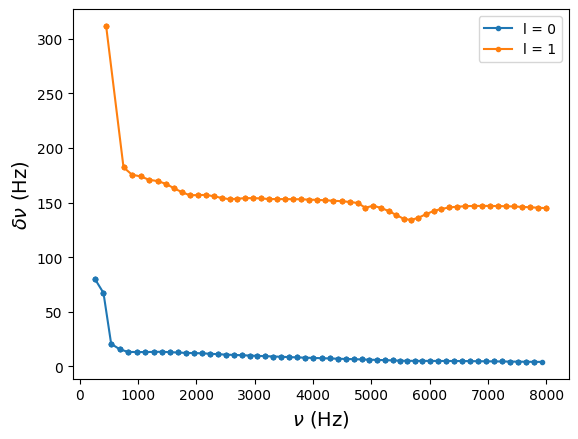

In [95]:
small_sep_l0, freq_sep_l0 = small_sep(0, model["l"], model["np"], model["freq"])
small_sep_l1, freq_sep_l1 = small_sep(1, model["l"], model["np"], model["freq"])



plt.plot(freq_sep_l0, small_sep_l0 , label= 'l = 0', marker = ".")
plt.plot(freq_sep_l1 , small_sep_l1, label= 'l = 1', marker = ".")
plt.xlabel(r'$\nu$ (Hz)', size=14)
plt.ylabel (r'$\delta \nu$ (Hz)', size=14)
#plt.ylim(0, 200)

plt.legend()
#plt.title('Small Separation as a function of frequency')
plt.show()

In [96]:
print('Large Separation : ∆ν ≡ νₙ₊₁,ₗ − νₙ,ₗ')

def large_sep( l , ls, nps, freqs):
    
    large_sep = []
    freq_sep = []
    
    for n in nps:
        condition_n_plus_1 = (nps == n + 1) & (ls == l)
        condition_n = (nps == n) & (ls == l)

        # Condition necessary for l = 3
        if np.any(condition_n_plus_1) and np.any(condition_n):
            separation = freqs[condition_n_plus_1] - freqs[condition_n]
            
            if separation.size > 0:
                large_sep.append(separation[0])
                freq = freqs[(nps == n + 1) & (ls == l)]
                freq_sep.append(freq[0])
                
    sort_idx = np.argsort(freq_sep)
    freq_sep = np.array(freq_sep)[sort_idx]
    large_sep = np.array(large_sep)[sort_idx]
    
    return np.array(large_sep), np.array(freq_sep)

Large Separation : ∆ν ≡ νₙ₊₁,ₗ − νₙ,ₗ


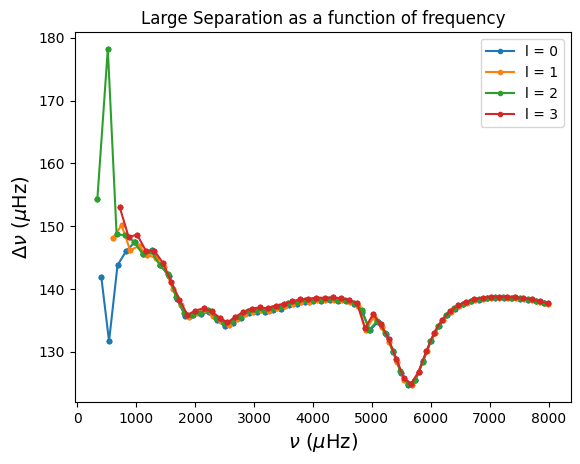

In [97]:
for l in range(4):
    large_sep_l, freq_sep_l = large_sep(l, model["l"], model["np"], model["freq"])
    plt.plot(freq_sep_l, large_sep_l, label= 'l = ' + str(l), marker = ".")
    plt.xlabel(r'$\nu$ ($\mu$Hz)', size=14)
    plt.ylabel (r'$\Delta \nu$ ($\mu$Hz)', size=14)
    #plt.ylim(130, 148)
    #plt.xlim(1000, 5000)
    #plt.xlim(left=1000)
    
plt.legend(loc='upper right')
plt.title('Large Separation as a function of frequency')
plt.show()

## Exercise 4
The eigen-frequencies of solar oscillations, and in consequence, the large and small separations, can be obtained from fitting an adequate function to the data.

### 4(a)
Fit a Lorentzian function to the obtained Fourier spectrum to obtain the observed eigen-frequencies (choose some of the observed peaks to fit)

[3.18471338e-01 1.50000000e-03 3.02400000e+03 0.00000000e+00
 3.18471338e-01 1.50000000e-03 3.03400000e+03 0.00000000e+00
 3.18471338e-01 1.50000000e-03 3.08000000e+03 0.00000000e+00
 3.18471338e-01 1.50000000e-03 3.09500000e+03 0.00000000e+00
 3.18471338e-01 1.50000000e-03 3.16500000e+03 0.00000000e+00
 3.18471338e-01 1.50000000e-03 3.18600000e+03 0.00000000e+00]


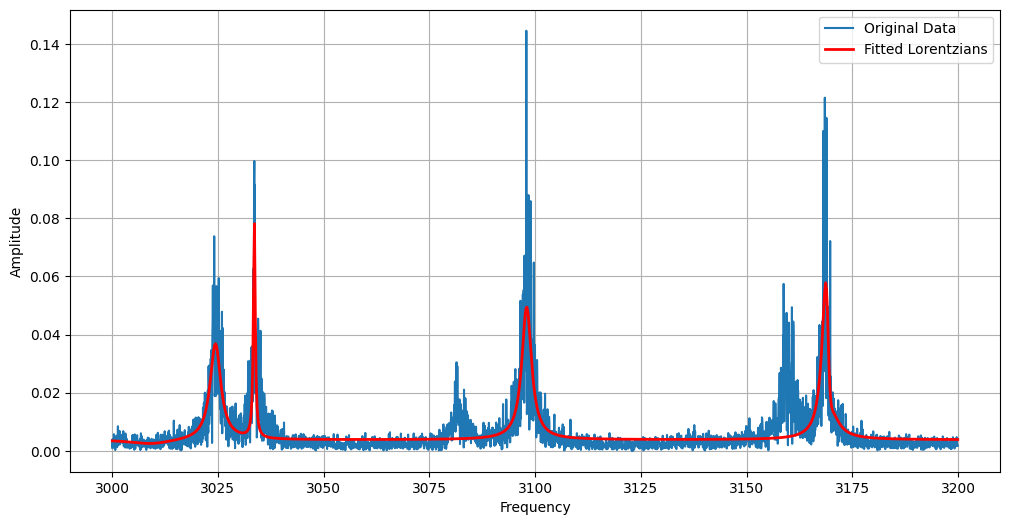

[ 2.27802111e+05  2.34324059e+00  3.16923209e+03  1.00832759e-02
  3.93112378e+03  5.26402543e-01  3.03361283e+03 -9.64465809e-03
  2.07298279e+03 -1.27647429e+01  3.00933696e+03  5.39117266e-03
  1.02502433e+04  3.08586299e+00  3.02441339e+03 -5.63537946e-03
  1.27435870e+04  2.78732511e+00  3.09800982e+03 -2.66184036e-03
  2.16127655e+05 -2.31412449e+00  3.16926912e+03  6.24876143e-03]


In [137]:
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

#freq1_2= freq1[:790560//2]
#fft_normalized1_2=2.0/790560 * np.abs(fft_normalized1)[0:790560//2]
#fft_normalized1_2=fft_normalized1



freqs = freq*1e6
amp  =  2.0/790560 * np.abs(fft_v_pm1_cali1)[0:790560//2]
#2700, 3700
xmin = 3000
xmax = 3200
mask = (freqs >= xmin) & (freqs <= xmax)

frequency_data = freqs[mask]  
amplitude_data = amp[mask]

def lorentzian(x, A, w, x0, y0):
    return 0.000005*A * (0.5*w) / ((x - x0)**2 + ((0.5*w)**2)) + y0

def fit_multiple_lorentzians(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 4):
        A, w, x0, y0 = params[i:i+4]
        y += lorentzian(x, A, w, x0, y0)
    return y

# Expected peak positions
#mask = (model["freq"] >= 3*1000) & (model["freq"] <= 3.6*1000)
#expected_peak_positions = model["freq"][mask]/1000

expected_peak_positions = np.array([3.024,3.034 ,3.08 ,3.095, 3.165,3.186])*1000

# Number of peaks
num_peaks = len(expected_peak_positions)

# Set up initial parameters
initial_params = []

for x0 in expected_peak_positions:
    # Set reasonable initial guesses based on your amplitude and width ranges
    initial_A = 1/3.14  # Initial amplitude guess (between 0 and 0.14)
    initial_w = 0.0015  # Initial width guess (you can adjust this)
    initial_y0 = 0.0  # Initial baseline offset guess

    initial_params.extend([initial_A, initial_w, x0, initial_y0])

# Convert the list to a NumPy array
initial_params = np.array(initial_params)

print(initial_params)


# Fit the function to the data
params, covariance = curve_fit(fit_multiple_lorentzians, frequency_data, amplitude_data, p0=initial_params, maxfev=70000)

x_fit = np.linspace(min(frequency_data), max(frequency_data), 1000)
y_fit = fit_multiple_lorentzians(x_fit, *params)

plt.figure(figsize=(12, 6))
plt.plot(frequency_data, amplitude_data, label='Original Data')
plt.plot(x_fit, y_fit, label='Fitted Lorentzians', linestyle='-', linewidth=2, color='red')
plt.legend()
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid()
plt.show()
print(params)

[ 2.27802111e+05  2.34324059e+00  3.16923209e+03  1.00832759e-02
  3.93112378e+03  5.26402543e-01  3.03361283e+03 -9.64465809e-03
  2.07298279e+03 -1.27647429e+01  3.00933696e+03  5.39117266e-03
  1.02502433e+04  3.08586299e+00  3.02441339e+03 -5.63537946e-03
  1.27435870e+04  2.78732511e+00  3.09800982e+03 -2.66184036e-03
  2.16127655e+05 -2.31412449e+00  3.16926912e+03  6.24876143e-03]


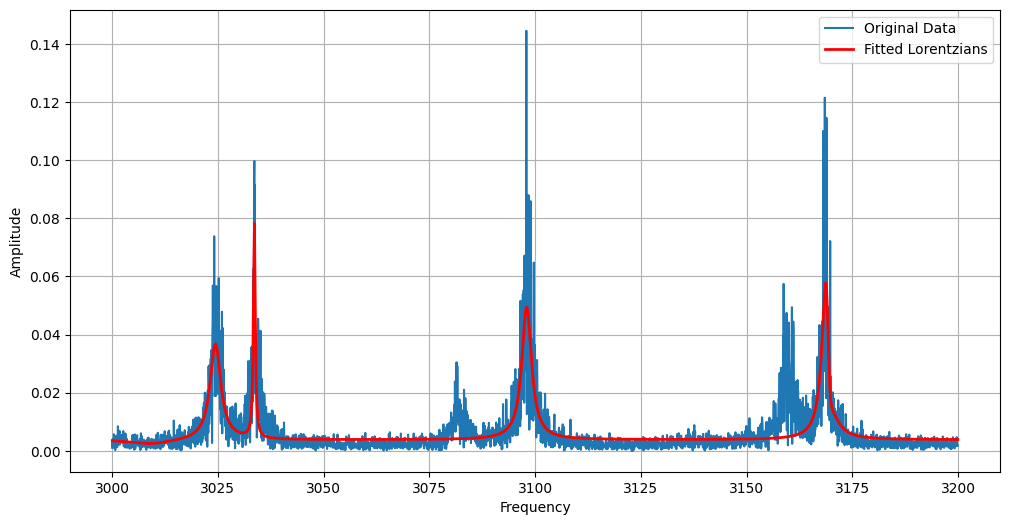

[ 4.03703348e+05  2.33805588e+00  3.16924037e+03  1.03934454e-02
  3.93104750e+03  5.26395778e-01  3.03361283e+03 -7.36031474e-03
  2.06270843e+03 -1.26630722e+01  3.00933832e+03  5.34102886e-03
  1.02483230e+04  3.08535963e+00  3.02441350e+03 -5.95815816e-03
  1.27438800e+04  2.78738482e+00  3.09800982e+03 -5.31460781e-03
  3.92027277e+05 -2.32181699e+00  3.16926104e+03  6.67951825e-03]
[ 4.03703348e+05  2.33805588e+00  3.16924037e+03  1.03934454e-02
  3.93104750e+03  5.26395778e-01  3.03361283e+03 -7.36031474e-03
  2.06270843e+03 -1.26630722e+01  3.00933832e+03  5.34102886e-03
  1.02483230e+04  3.08535963e+00  3.02441350e+03 -5.95815816e-03
  1.27438800e+04  2.78738482e+00  3.09800982e+03 -5.31460781e-03
  3.92027277e+05 -2.32181699e+00  3.16926104e+03  6.67951825e-03]


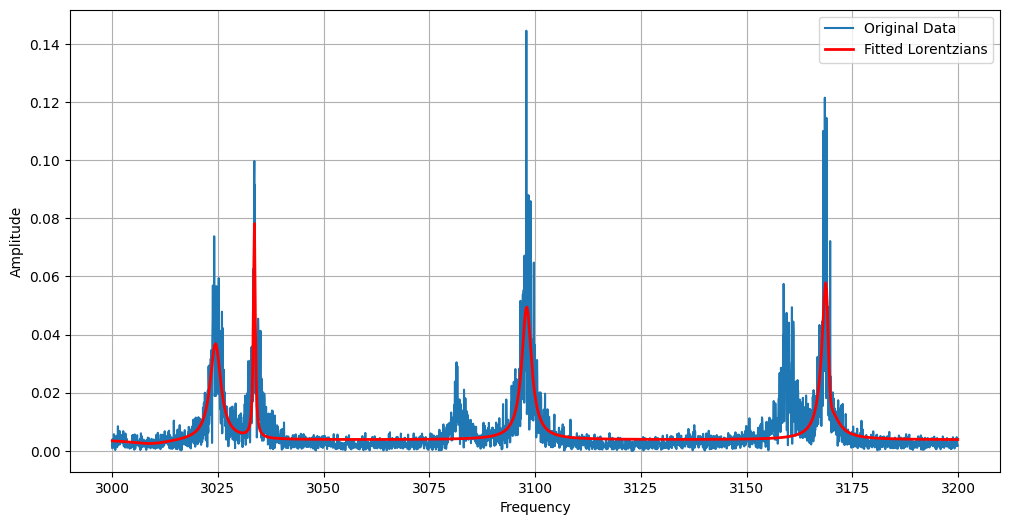

[ 4.06916237e+05  2.33784338e+00  3.16924064e+03  1.06434954e-02
  3.93128577e+03  5.26418836e-01  3.03361283e+03 -7.14645990e-03
  2.08939009e+03 -1.29230488e+01  3.00933517e+03  4.51469766e-03
  1.02543436e+04  3.08705014e+00  3.02441322e+03 -5.82548645e-03
  1.27434517e+04  2.78729779e+00  3.09800982e+03 -5.08016228e-03
  3.95240221e+05 -2.32172286e+00  3.16926115e+03  6.67553035e-03]
[ 4.06916237e+05  2.33784338e+00  3.16924064e+03  1.06434954e-02
  3.93128577e+03  5.26418836e-01  3.03361283e+03 -7.14645990e-03
  2.08939009e+03 -1.29230488e+01  3.00933517e+03  4.51469766e-03
  1.02543436e+04  3.08705014e+00  3.02441322e+03 -5.82548645e-03
  1.27434517e+04  2.78729779e+00  3.09800982e+03 -5.08016228e-03
  3.95240221e+05 -2.32172286e+00  3.16926115e+03  6.67553035e-03]


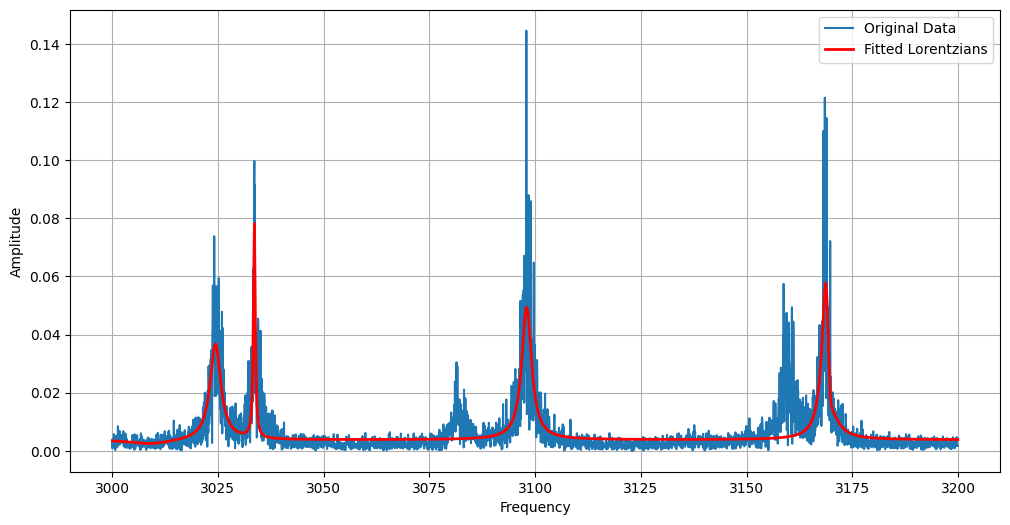

[ 4.15284339e+05  2.33776316e+00  3.16924077e+03  1.04705687e-02
  3.93129713e+03  5.26419534e-01  3.03361283e+03 -7.27165723e-03
  2.09142959e+03 -1.29421248e+01  3.00933464e+03  4.57220446e-03
  1.02547683e+04  3.08716769e+00  3.02441318e+03 -6.19755656e-03
  1.27433909e+04  2.78728525e+00  3.09800982e+03 -4.76888938e-03
  4.03608570e+05 -2.32197889e+00  3.16926086e+03  6.97702384e-03]


In [138]:
for j in range(3):
    params4 = []
    for i in range(0, len(params), 4):
        subarray = params[i:i + 4]
        params4.append(subarray)

    initial_params = []
    
    for k in range(len(params4)):
        if params4[k][2] < xmin or params4[k][2] > xmax: continue
        if params4[k][0] < 0 and params4[k][3]: continue
        initial_params.extend(params4[k])
    
    # Convert the list to a NumPy array
    initial_params = np.array(initial_params)

    #print(initial_params)

    # Fit the function to the data
    params, covariance = curve_fit(fit_multiple_lorentzians, frequency_data, amplitude_data, p0=initial_params, maxfev=70000)

    x_fit = np.linspace(min(frequency_data), max(frequency_data), 1000)
    y_fit = fit_multiple_lorentzians(x_fit, *params)

    plt.figure(figsize=(12, 6))
    plt.plot(frequency_data, amplitude_data, label='Original Data')
    plt.plot(x_fit, y_fit, label='Fitted Lorentzians', linestyle='-', linewidth=2, color='red')
    plt.legend()
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()
    print(params)

    